In [2]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob

# Using glob to extract all csv files from working directory
extension="csv"
data_files=[i for i in glob.glob('data files/*.{}'.format(extension))]
# Combining all the files in the data_files list
df_youtube=pd.concat([pd.read_csv(j) for j in data_files])
# Converting to csv
df_youtube.to_csv('Youtube_Statistics.csv', index=False, encoding='utf-8-sig')

In [2]:
# Using pandas library to analyze my data
df_youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [3]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202310 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  202310 non-null object
trending_date             202310 non-null object
title                     202310 non-null object
channel_title             202310 non-null object
category_id               202310 non-null int64
publish_time              202310 non-null object
tags                      202310 non-null object
views                     202310 non-null int64
likes                     202310 non-null int64
dislikes                  202310 non-null int64
comment_count             202310 non-null int64
thumbnail_link            202310 non-null object
comments_disabled         202310 non-null bool
ratings_disabled          202310 non-null bool
video_error_or_removed    202310 non-null bool
description               195368 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 22.2+ MB


In [4]:
# detecting missing values
df_youtube.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               6942
dtype: int64

In [17]:
# dropping columns with the missing values
df_youtube.drop(['description'], axis=1, inplace=True)

In [6]:
df_youtube.sample(6, random_state=0)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
2275,1RnrSs1eaVw,17.25.11,Zap Koreus n°257,Zap Koreus,24,2017-11-24T16:47:54.000Z,"zap""|""koreus""|""koreusity""|""zapping",39394,244,20,24,https://i.ytimg.com/vi/1RnrSs1eaVw/default.jpg,False,False,False
4634,84hXRY0uwQ0,17.07.12,Actors on Actors: Saoirse Ronan and Kristen Wi...,Variety,24,2017-12-05T17:00:00.000Z,"Variety|""Variety Studio""|""Actors on Actors""|""S...",126172,2048,75,212,https://i.ytimg.com/vi/84hXRY0uwQ0/default.jpg,False,False,False
3062,UceaB4D0jpo,17.29.11,Post Malone - rockstar ft. 21 Savage,PostMaloneVEVO,10,2017-11-22T05:00:01.000Z,"Post Malone new music|""Stoney""|""Beer Bongs and...",34275219,1174335,34499,96947,https://i.ytimg.com/vi/UceaB4D0jpo/default.jpg,False,False,False
29371,M4ZoCHID9GI,18.19.04,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,10,2018-04-12T16:00:04.000Z,"The|""Weeknd""|""Call""|""Out""|""My""|""Name""",21153134,739434,13742,36935,https://i.ytimg.com/vi/M4ZoCHID9GI/default.jpg,False,False,False
660,gUy-GPaWXaA,17.17.11,YouTaxi - Episode 18 - 16 Novembre 2017,TFM (Télé Futurs Medias),24,2017-11-16T21:42:14.000Z,"abdoulaye""|""wade""|""karim""|""macky""|""sall""|""tfm""...",64950,807,55,125,https://i.ytimg.com/vi/gUy-GPaWXaA/default.jpg,False,False,False
3064,FEXGRMAj9HE,17.29.11,Folge 2554: Die Überraschungsparty | Rote Rosen,Rote Rosen Official,24,2017-11-28T13:10:02.000Z,Rote Rosen,9138,96,5,25,https://i.ytimg.com/vi/FEXGRMAj9HE/default.jpg,False,False,False


In [18]:
# To standardize date columns I'm converting them to datetime from object
df_youtube['trending_date']=pd.to_datetime(df_youtube['trending_date'], format='%y.%d.%m')
df_youtube['publish_time']=pd.to_datetime(df_youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df_youtube[['trending_date', 'publish_time']].head()

,trending_date,publish_time
0,2017-11-14,2017-11-10 17:00:03
1,2017-11-14,2017-11-13 17:00:00
2,2017-11-14,2017-11-12 19:05:24
3,2017-11-14,2017-11-12 18:01:41
4,2017-11-14,2017-11-09 11:04:14


In [19]:
# Separeting 'date' and 'time' columns from 'publish_time' columns

df_youtube.insert(4, 'publish_date', df_youtube['publish_time'].dt.date)
df_youtube['publish_time']=df_youtube['publish_time'].dt.time
# And then I'm converting this separated column into datetime variable
df_youtube['publish_date']=pd.to_datetime(df_youtube['publish_date'])
df_youtube[['trending_date', 'publish_date']].head()

,trending_date,publish_date
0,2017-11-14,2017-11-10
1,2017-11-14,2017-11-13
2,2017-11-14,2017-11-12
3,2017-11-14,2017-11-12
4,2017-11-14,2017-11-09


In [3]:
# I'm creating a dictionary to hold a json file which has the info of categories
category_info={}
# by the help of this function I read the json file and then I extracted
# the data that I wanted to my dictionary
with open('data files/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_info[category["id"]]=category["snippet"]["title"]

print(category_info)
    

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


In [4]:
# To map category_id and category infos I'm converting category_id to string type
df_youtube['category_id']=df_youtube['category_id'].astype(str)
# I'm creating Category columns thanks to map func.
df_youtube['Category']=df_youtube['category_id'].map(category_info)
df_youtube['Category'].head()

0            Music
1           Comedy
2           Comedy
3    Entertainment
4            Music
Name: Category, dtype: object

In [22]:
# descriptions of the int type columns
df_youtube.describe()
# the top 5 videos that have the least views
df_youtube.nsmallest(5, 'views')
# the top 5 videos that have the most views
df_youtube.nlargest(5, 'views') #as you can see, all these videos are in the music category

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,Category
28412,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,2018-03-02,10,05:00:19,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Music
28212,_I_D_8Z4sJE,2018-04-06,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,2018-03-02,10,05:00:19,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",413586699,2768654,145643,97218,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Music
28008,_I_D_8Z4sJE,2018-04-05,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,2018-03-02,10,05:00:19,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",402650804,2719005,142006,95713,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Music
27811,_I_D_8Z4sJE,2018-04-04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,2018-03-02,10,05:00:19,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",392036878,2670723,138334,93834,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Music
27615,_I_D_8Z4sJE,2018-04-03,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,2018-03-02,10,05:00:19,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",382401497,2618320,134625,92387,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Music


In [23]:
# correlation matrix between these variables
corr_columns=["views", "likes", "dislikes", "comment_count"]
corr_mtrx=df_youtube[corr_columns].corr()
corr_mtrx

,views,likes,dislikes,comment_count
views,1.000000,0.784467,0.415790,0.501928
likes,0.784467,1.000000,0.454301,0.780923
dislikes,0.415790,0.454301,1.000000,0.727815
comment_count,0.501928,0.780923,0.727815,1.000000


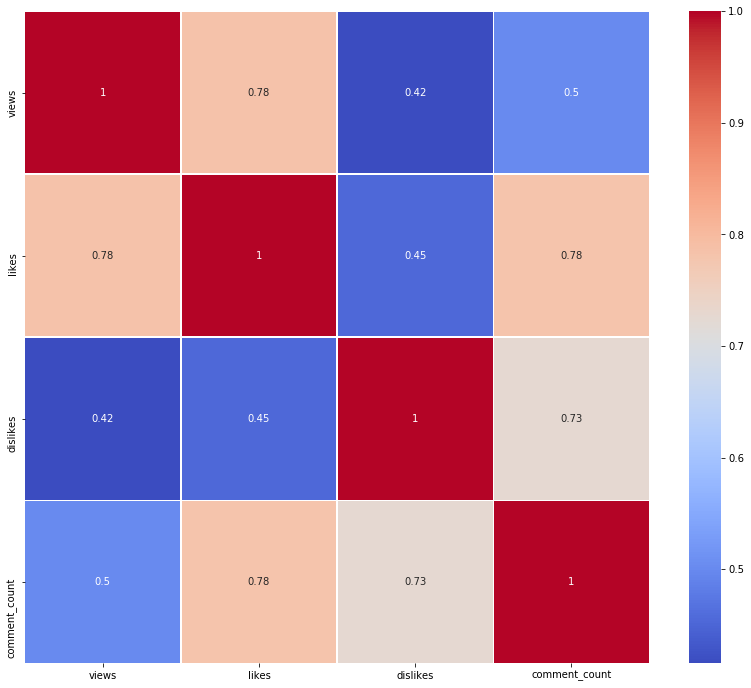

In [24]:
# Visualizing Section

# Draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

Text(0, 0.5, 'Count')

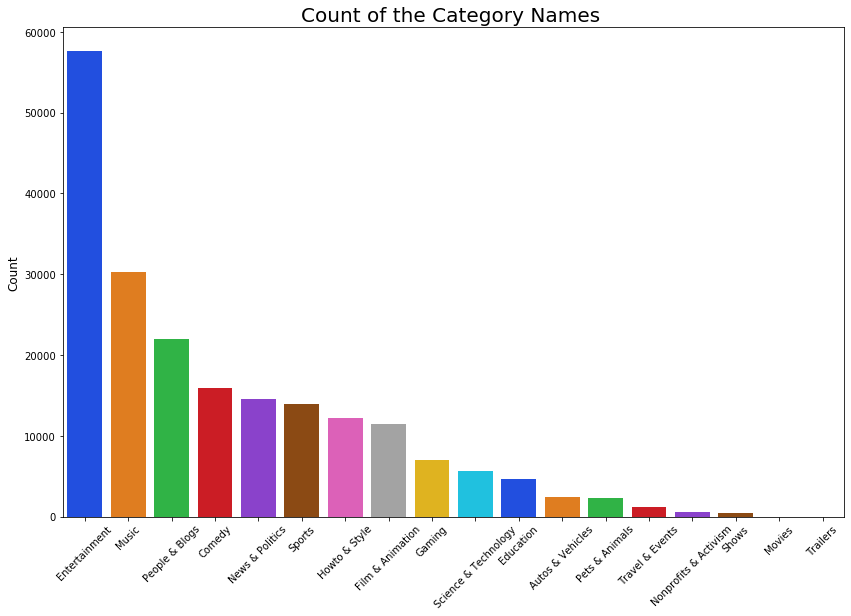

In [5]:
# Counting the video category names
plt.figure(figsize = (14,9))
gr = sns.countplot('Category', data=df_youtube, palette="bright", order = df_youtube['Category'].value_counts().index)
gr.set_xticklabels(gr.get_xticklabels(),rotation=45)
gr.set_title("Count of the Category Names ", fontsize=20)
gr.set_xlabel("", fontsize=12)
gr.set_ylabel("Count", fontsize=12)

Text(0, 0.5, 'Views')

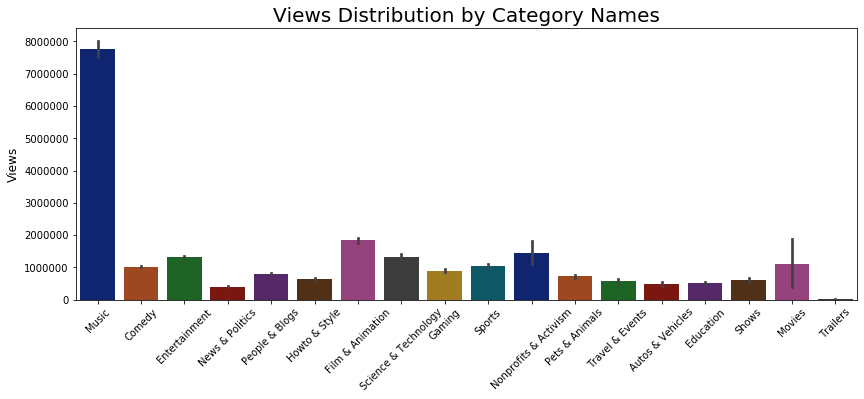

In [26]:
# Graphs to measure how many views, likes, dislikes and comments get by different categories

plt.figure(figsize = (14,5))
# Views distribution that shows watch rates of category names
g_v = sns.barplot(x="Category", y="views", data=df_youtube, palette="dark")
g_v.set_xticklabels(g_v.get_xticklabels(),rotation=45)
g_v.set_title("Views Distribution by Category Names", fontsize=20)
g_v.set_xlabel("", fontsize=12)
g_v.set_ylabel("Views", fontsize=12)

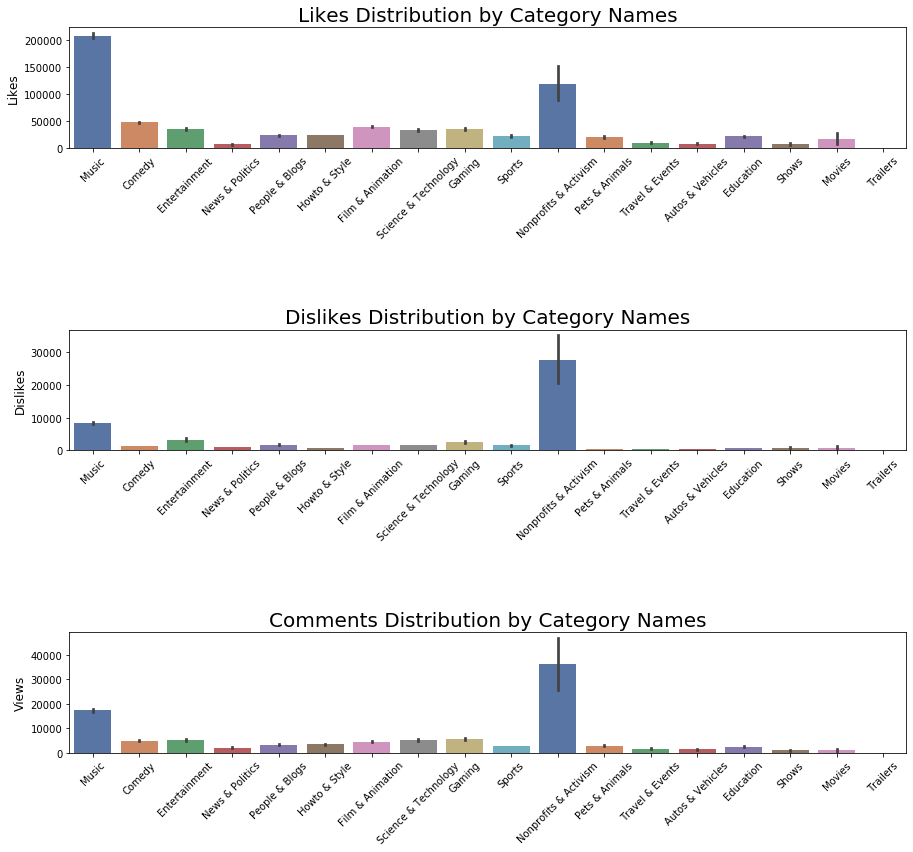

In [27]:
# Likes distribution by category names
plt.figure(figsize = (15,13))

plt.subplot(311)
g_l=sns.barplot(x="Category", y="likes", data=df_youtube, palette="deep")
g_l.set_xticklabels(g_l.get_xticklabels(),rotation=45)
g_l.set_title("Likes Distribution by Category Names", fontsize=20)
g_l.set_xlabel("", fontsize=12)
g_l.set_ylabel("Likes", fontsize=12)

# Dislikes distribution by category names
plt.subplot(312)
g_dl=sns.barplot(x="Category", y="dislikes", data=df_youtube, palette="deep")
g_dl.set_xticklabels(g_dl.get_xticklabels(),rotation=45)
g_dl.set_title("Dislikes Distribution by Category Names", fontsize=20)
g_dl.set_xlabel("", fontsize=12)
g_dl.set_ylabel("Dislikes", fontsize=12)

# Comments distribution that shows watch rates of category names
plt.subplot(313)
g_cm = sns.barplot(x="Category", y="comment_count", data=df_youtube, palette="deep")
g_cm.set_xticklabels(g_cm.get_xticklabels(),rotation=45)
g_cm.set_title("Comments Distribution by Category Names", fontsize=20)
g_cm.set_xlabel("", fontsize=12)
g_cm.set_ylabel("Views", fontsize=12)

plt.subplots_adjust(hspace = 1.5, top = .9)
plt.show()

<Figure size 1080x504 with 0 Axes>

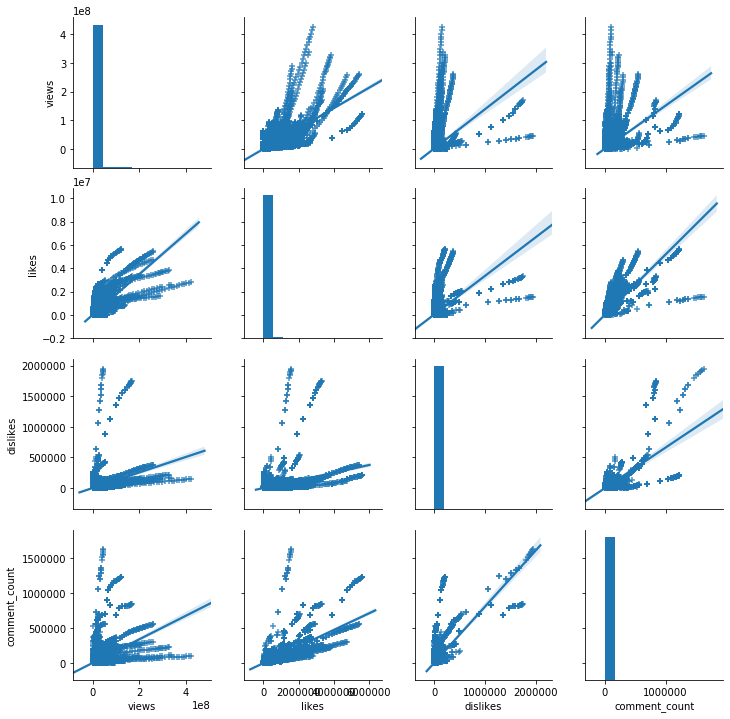

In [91]:
# Plotting each numerical variable against each other
plt.figure(figsize = (15,7))
gr_pair=sns.pairplot(df_youtube[['views', 'likes', 'dislikes', 'comment_count']], kind="reg", markers="+")